# Best Books of the 21st Century
**An Exploratory Data Analysis**  
Ginanjar Saputra, 18 March 2021

I'm an avid reader. Since I started learning data science, I've been interested in doing a project related to books or reading.

## Dataset

Before we begin, let's import the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from wordcloud import WordCloud

The books data were collected by scraping the ["Best Books of the 21st Century"](https://www.goodreads.com/list/show/7) list on [Goodreads](https://www.goodreads.com/). At the time of scraping (19 February 2021), the full list contains 9032 books spread across 91 pages, but for the purpose of this analysis I will only use a smaller sample: 500 books (first 5 pages). Load a CSV file of the data as a pandas dataframe.

In [2]:
df = pd.read_csv('Best-Books-of-the-21st-Century.csv')
df.head()

,score,vote,title,author,genre,star,n_rating,n_review,pages,year
0,398777,4031,Harry Potter and the Deathly Hallows,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",4.62,2916570,67432,759,2007
1,296347,3025,The Hunger Games,Suzanne Collins,"['Young Adult', 'Fiction', 'Science Fiction', ...",4.32,6600922,174470,374,2008
2,263628,2677,The Kite Runner,Khaled Hosseini,"['Fiction', 'Historical', 'Historical Fiction'...",4.31,2507857,75613,371,2004
3,255666,2604,The Book Thief,Markus Zusak,"['Historical', 'Historical Fiction', 'Fiction'...",4.38,1911749,115525,552,2006
4,222873,2295,Harry Potter and the Half-Blood Prince,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",4.57,2537401,41151,652,2006


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   score     500 non-null    int64  
 1   vote      500 non-null    int64  
 2   title     500 non-null    object 
 3   author    500 non-null    object 
 4   genre     500 non-null    object 
 5   star      500 non-null    float64
 6   n_rating  500 non-null    int64  
 7   n_review  500 non-null    int64  
 8   pages     500 non-null    int64  
 9   year      500 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 39.2+ KB


From the dataframe information above we can see that there are no missing values (nulls) in the data and that each column is of a proper data type. The dataframe has 10 columns with the following description:

|Column  |Description                                |
|:-------|:------------------------------------------|
|score   |Total score, decides where a book is ranked|
|vote    |Number of votes given for the book         |
|title   |The title of the book                      |
|author  |Author of the book                         |
|genre   |The genre(s) to which the book belongs     |
|star    |The average value of rating (star) given   |
|n_rating|Number of ratings given for the book       |
|n_review|Number of reviews left by readers          |
|pages   |Total number of pages                      |
|year    |The year in which the book was published   |

In [4]:
with pd.option_context('float_format', '{:.2f}'.format):
    print(df.describe())

          score    vote   star   n_rating  n_review   pages    year
count    500.00  500.00 500.00     500.00    500.00  500.00  500.00
mean   15790.93  168.92   3.98  386912.58  18692.81  422.97 2008.16
std    38391.72  393.95   0.26  624365.07  22633.83  196.55    3.57
min     1181.00   12.00   3.24      72.00      7.00    0.00 2001.00
25%     1815.00   23.00   3.82   82739.75   4766.75  306.00 2006.00
50%     3402.00   40.50   3.98  179622.00  10656.00  380.50 2008.00
75%     9687.25  109.25   4.15  444906.50  23471.00  487.00 2011.00
max   398777.00 4031.00   4.62 6600922.00 174470.00 1531.00 2020.00


## Data Preprocessing

### Binning data into categories

In the list, the books are ranked from 1 to 500. The rankings will be converted into categorical values in a new column `rank_bin`.

In [5]:
df.insert(0, 'rank', range(1,501))
df.insert(1, 'rank_bin', pd.cut(
    df['rank'],
    bins=[0, 100, 200, 300, 400, 500],
    labels=['1-100', '100-200', '200-300', '300-400', '400-500']))
df.drop('rank', axis=1, inplace=True)
df.head()

,rank_bin,score,vote,title,author,genre,star,n_rating,n_review,pages,year
0,1-100,398777,4031,Harry Potter and the Deathly Hallows,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",4.62,2916570,67432,759,2007
1,1-100,296347,3025,The Hunger Games,Suzanne Collins,"['Young Adult', 'Fiction', 'Science Fiction', ...",4.32,6600922,174470,374,2008
2,1-100,263628,2677,The Kite Runner,Khaled Hosseini,"['Fiction', 'Historical', 'Historical Fiction'...",4.31,2507857,75613,371,2004
3,1-100,255666,2604,The Book Thief,Markus Zusak,"['Historical', 'Historical Fiction', 'Fiction'...",4.38,1911749,115525,552,2006
4,1-100,222873,2295,Harry Potter and the Half-Blood Prince,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",4.57,2537401,41151,652,2006


The statistical summary shows that the values for `star` ranges from 3.24 to 4.62. Using the method `.cut()` the values will be binned into 4 categories, inserted as a new column `star_bin`.
- 3.0-3.5 = 3.5 Stars
- 3.5-4.0 = 4.0 Stars
- 4.0-4.5 = 4.5 Stars
- 4.5-5.0 = 5.0 Stars

In [6]:
df.insert(7, 'star_bin', pd.cut(
    df['star'],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0],
    labels=['3.5 Stars', '4.0 Stars', '4.5 Stars', '5.0 Stars']
))
df.head()

,rank_bin,score,vote,title,author,genre,star,star_bin,n_rating,n_review,pages,year
0,1-100,398777,4031,Harry Potter and the Deathly Hallows,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",4.62,5.0 Stars,2916570,67432,759,2007
1,1-100,296347,3025,The Hunger Games,Suzanne Collins,"['Young Adult', 'Fiction', 'Science Fiction', ...",4.32,4.5 Stars,6600922,174470,374,2008
2,1-100,263628,2677,The Kite Runner,Khaled Hosseini,"['Fiction', 'Historical', 'Historical Fiction'...",4.31,4.5 Stars,2507857,75613,371,2004
3,1-100,255666,2604,The Book Thief,Markus Zusak,"['Historical', 'Historical Fiction', 'Fiction'...",4.38,4.5 Stars,1911749,115525,552,2006
4,1-100,222873,2295,Harry Potter and the Half-Blood Prince,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",4.57,5.0 Stars,2537401,41151,652,2006


### Literal evaluation of genre lists

The entries in the column `genre` are represented as strings instead of Python lists. Applying [`.literal_eval()`](https://docs.python.org/3/library/ast.html#ast.literal_eval), these string-ified representations will be evaluated and returned as lists.

In [7]:
df['genre'][0]

"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Childrens', 'Middle Grade', 'Classics', 'Science Fiction Fantasy']"

In [8]:
df['genre'] = df['genre'].apply(lambda x: literal_eval(x))
df['genre'][0]

['Fantasy',
 'Young Adult',
 'Fiction',
 'Fantasy',
 'Magic',
 'Childrens',
 'Adventure',
 'Audiobook',
 'Childrens',
 'Middle Grade',
 'Classics',
 'Science Fiction Fantasy']

## Exploratory Data Analysis

### Top titles
Create a new dataframe `top_scorer`, listing the 10 highly-scored book titles.

In [9]:
top_scorer = df[['score', 'title']].sort_values(
    by='score', ascending=False)
top_scorer = top_scorer[:10]

Visualize the result with a horizontal bar chart.

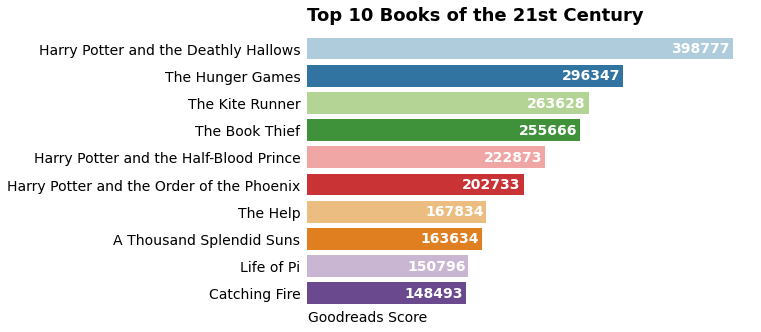

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x='score', y='title',
    data=top_scorer, palette='Paired')
plt.figtext(
    0.125, 0.92,
    'Top 10 Books of the 21st Century',
    size=18,
    weight='bold')
plt.xlabel('Goodreads Score', size=14, x=0.135)
plt.ylabel(None)
plt.tick_params(
    axis='both',
    which='major',
    labelsize=14,
    left=False,
    bottom=False,
    labelbottom=False)

for rect in ax.patches:
    width = rect.get_width()
    plt.text(
        rect.get_width()-30000,
        rect.get_y()+0.5*rect.get_height(),
        int(width),
        ha='center',
        va='center',
        size=14,
        weight='bold',
        color='white')
    
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False) 
fig.savefig(
    'img1-top-10-books.png',
    dpi=300, bbox_inches='tight')
plt.show()

Book series seem to be receiving the highest scores. With a total of three books in the top-10, the [*Harry Potter*](https://www.goodreads.com/book/show/136251.Harry_Potter_and_the_Deathly_Hallows) septology by J.K. Rowling is the best-scored. [*The Hunger Games*](https://www.goodreads.com/book/show/2767052-the-hunger-games) series by Suzanne Collins comes in second with two top-scoring books.

### Authors by book count
Let's first find out how many authors are in the list and how many appear more than once.

In [11]:
auth_works = df.groupby('author').size().reset_index(name='count')
auth_works.sort_values(by='count', ascending=False, inplace=True)
auth_works_1 = auth_works.loc[auth_works['count'] > 1]
print(f"Unique authors        : {df['author'].nunique()}\n"
      f'Authors appearing >1× : {auth_works_1.shape[0]}')

Unique authors        : 338
Authors appearing >1× : 82


The following cell returns a bar chart showing the authors whose number of works in the list is greater than 3.

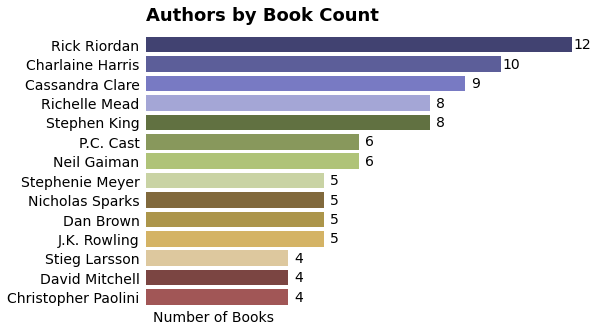

In [12]:
auth_works_3 = auth_works.loc[auth_works['count'] > 3]

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x='count', y='author',
    data=auth_works_3, palette='tab20b')
plt.figtext(
    0.125, 0.92,
    'Authors by Book Count',
    size=18,
    weight='bold')
plt.xlabel('Number of Books', size=14, x=0.15)
plt.ylabel(None)
plt.tick_params(
    axis='both',
    which='major',
    labelsize=14,
    left=False,
    bottom=False,
    labelbottom=False)

for rect in ax.patches:
    width = rect.get_width()
    plt.text(
        rect.get_width()+0.3,
        rect.get_y()+0.5*rect.get_height(),
        '%d' % int(width),
        ha='center',
        va='center',
        size=14)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.savefig(
    'img2-authors-book-count.png',
    dpi=300, bbox_inches='tight')
plt.show()

Author of the Percy Jackson series, [Rick Riordan](https://www.goodreads.com/author/show/15872.Rick_Riordan), has the highest book count in the list: 12 books.

In [13]:
riordan = df.loc[df['author'] == 'Rick Riordan']
riordan['title']

23                 The Lightning Thief
115                  The Last Olympian
123                The Sea of Monsters
129                  The Titan's Curse
133        The Battle of the Labyrinth
158                      The Lost Hero
244                 The Mark of Athena
247                 The Son of Neptune
272                    The Red Pyramid
385                 The Throne of Fire
414                 The House of Hades
430    Percy Jackson and the Olympians
Name: title, dtype: object

### Authors by ranking
We'll look at how authors are distributed in each ranking category by applying one-hot encoding technique and then summing the frequency of each author's appearance. The result will be limited to only show the top 20.

In [14]:
top_auths = pd.get_dummies(df['author'])
top_auths.insert(0, 'rank_bin', df['rank_bin'])
top_auths = top_auths.groupby('rank_bin').sum().T
top_auths = top_auths.sort_values(
    by=['1-100', '100-200', '200-300', '300-400', '400-500'],
    ascending=[False, False, False, False, False])
top_auths = top_auths.head(20).sort_index().T
top_auths

,Cassandra Clare,Cormac McCarthy,Dan Brown,David Mitchell,Geraldine Brooks,Haruki Murakami,Ian McEwan,J.K. Rowling,Jodi Picoult,John Green,Jonathan Safran Foer,Khaled Hosseini,Neil Gaiman,Richelle Mead,Rick Riordan,Stephen King,Stephenie Meyer,Stieg Larsson,Suzanne Collins,Veronica Roth
rank_bin,,,,,,,,,,,,,,,,,,,,
1-100,3,2,2,1,1,1,1,3,2,2,2,2,3,1,1,1,5,3,3,2
100-200,3,0,1,1,1,1,1,1,0,0,0,0,2,5,5,1,0,1,0,1
200-300,2,0,1,1,1,0,1,0,0,1,0,1,0,0,3,2,0,0,0,0
300-400,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0
400-500,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,4,0,0,0,0


Visualize where the authors are ranked with a heatmap.

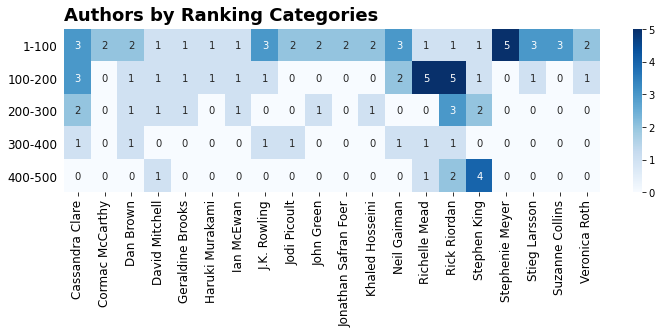

In [15]:
fig, ax = plt.subplots(figsize=(12,3))
sns.heatmap(
    top_auths, cmap='Blues',
    robust=True, annot=True)
plt.figtext(
    0.125, 0.92,
    'Authors by Ranking Categories',
    size=18, weight='bold')
plt.ylabel(None)
plt.tick_params(
    axis='both',
    which='major',
    labelsize=12,
    left=False)
fig.savefig(
    'img3-authors-by-ranking.png',
    dpi=300, bbox_inches='tight')
plt.show()

[Stephenie Meyer](https://www.goodreads.com/author/show/941441.Stephenie_Meyer)'s works are all ranked in the top 100, and four of those are books from The Twilight series (as displayed in the dataframe slice below). Other popular authors in the top 100 are [Cassandra Clare](https://www.goodreads.com/author/show/150038.Cassandra_Clare), [J.K. Rowling](https://www.goodreads.com/author/show/1077326.J_K_Rowling), [Neil Gaiman](https://www.goodreads.com/author/show/1221698.Neil_Gaiman), [Stieg Larsson](https://www.goodreads.com/author/show/706255.Stieg_Larsson), and [Suzzane Collins](https://www.goodreads.com/author/show/153394.Suzanne_Collins). Although his book count is the highest, Rick Riordan is only highly represented in the top 100-200. The top-ranked authors have one thing in common: they write fantasy books (series).

In [16]:
df.loc[df['author'] == 'Stephenie Meyer']

,rank_bin,score,vote,title,author,genre,star,star_bin,n_rating,n_review,pages,year
21,1-100,82599,866,Twilight,Stephenie Meyer,"[Young Adult, Fantasy, Romance, Fiction, Paran...",3.61,4.0 Stars,5140977,106284,501,2006
36,1-100,50749,544,The Host,Stephenie Meyer,"[Young Adult, Science Fiction, Fantasy, Romanc...",3.84,4.0 Stars,917942,41705,619,2008
37,1-100,50655,547,Breaking Dawn,Stephenie Meyer,"[Young Adult, Fantasy, Romance, Paranormal, Va...",3.70,4.0 Stars,1370966,47527,756,2008
39,1-100,48815,530,Eclipse,Stephenie Meyer,"[Young Adult, Fantasy, Romance, Paranormal, Va...",3.70,4.0 Stars,1474575,38343,629,2007
41,1-100,44947,492,New Moon,Stephenie Meyer,"[Young Adult, Fantasy, Romance, Paranormal, Va...",3.55,4.0 Stars,1520558,48316,563,2006


### Top-scored authors
Create a dataframe of 10 authors having the highest average scores.

In [17]:
author_avg_score = df.groupby(
    'author')['score'].mean().reset_index(name='avg_score')
author_avg_score.sort_values(
    by='avg_score', ascending=False, inplace=True)
author_avg_score = author_avg_score[:10]

Visualize the result.

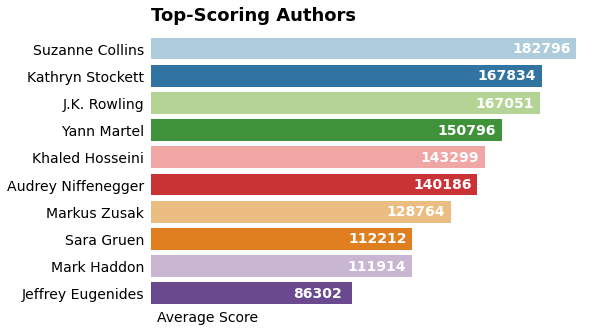

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x='avg_score', y='author',
    data=author_avg_score, palette='Paired')
plt.figtext(
    0.125, 0.92,
    'Top-Scoring Authors',
    size=18,
    weight='bold')
plt.xlabel('Average Score', size=14, x=0.125)
plt.ylabel(None)
plt.tick_params(
    axis='both',
    which='major',
    labelsize=14,
    left=False,
    bottom=False,
    labelbottom=False)
    
for rect in ax.patches:
    width = rect.get_width()
    plt.text(
        rect.get_width()-15000,
        rect.get_y()+0.5*rect.get_height(),
        '%d' % int(width),
        ha='center',
        va='center',
        size=14,
        weight='bold',
        color='white')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.savefig(
    'img4-top-scoring-author.png',
    dpi=300, bbox_inches='tight')
plt.show()

A noteworthy observation: more than half of the top-scorers are authors with only a single work in the 500 books list. [Kathryn Stockett](https://www.goodreads.com/author/show/1943477.Kathryn_Stockett), author of *The Help*, even surpassed J.K. Rowling by 800 points.

In [19]:
top_scored_auths = list(author_avg_score['author'].values)
auth_works.loc[auth_works['author'].apply(
    lambda x: x in top_scored_auths)].reset_index(drop=True)

,author,count
0,J.K. Rowling,5
1,Khaled Hosseini,3
2,Suzanne Collins,3
3,Markus Zusak,2
4,Mark Haddon,1
5,Yann Martel,1
6,Sara Gruen,1
7,Audrey Niffenegger,1
8,Kathryn Stockett,1
9,Jeffrey Eugenides,1


### Popular genres
The book genres will be converted into numerical values using one-hot encoding techniques.

In [20]:
# Make genres into columns
genres = pd.DataFrame(df['genre'])
for index, row in genres.iterrows():
    for genre in row['genre']:
        genres.at[index, genre] = 1
genres = genres.fillna(0)
genres.drop('genre', axis=1, inplace=True)
genres.insert(0, 'rank_bin', df['rank_bin'])
genres

,rank_bin,Fantasy,Young Adult,Fiction,Magic,Childrens,Adventure,Audiobook,Middle Grade,Classics,...,Disease,College,Chapter Books,Space Opera,Canadian Literature,Amazon,Wolves,Currency,Money,Abuse
0,1-100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1-100,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1-100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1-100,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1-100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,400-500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,400-500,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,400-500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,400-500,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Applying the method `.groupby()`, the sums of the frequency of each genre are grouped per ranking category. Because there are as many as 295 genres in total, the result will be limited to only show 20 genres with the greatest sums.

In [21]:
# Group genres by ranking, sum the frequency
genres_gby = genres.groupby('rank_bin').sum().T
genres_gby = genres_gby.sort_values(
    by=['1-100', '100-200', '200-300', '300-400', '400-500'],
    ascending=[False, False, False, False, False])
genres_gby = genres_gby.head(20).sort_index().T
genres_gby

,Adult,Adult Fiction,Adventure,Audiobook,Book Club,Classics,Contemporary,Cultural,Fantasy,Fiction,Historical,Historical Fiction,Literary Fiction,Literature,Mystery,Nonfiction,Novels,Romance,Science Fiction,Young Adult
rank_bin,,,,,,,,,,,,,,,,,,,,
1-100,45.0,29.0,14.0,37.0,24.0,15.0,46.0,15.0,36.0,83.0,38.0,34.0,17.0,24.0,19.0,17.0,38.0,25.0,15.0,32.0
100-200,35.0,22.0,21.0,37.0,18.0,4.0,29.0,17.0,48.0,87.0,27.0,23.0,20.0,20.0,24.0,13.0,29.0,29.0,17.0,37.0
200-300,38.0,25.0,19.0,37.0,16.0,0.0,33.0,16.0,39.0,84.0,31.0,28.0,18.0,21.0,15.0,15.0,27.0,36.0,14.0,32.0
300-400,38.0,25.0,13.0,44.0,18.0,0.0,29.0,23.0,42.0,85.0,25.0,23.0,22.0,13.0,24.0,14.0,30.0,37.0,10.0,32.0
400-500,29.0,22.0,19.0,38.0,10.0,2.0,37.0,18.0,48.0,86.0,23.0,21.0,15.0,17.0,22.0,10.0,27.0,42.0,18.0,36.0


Visualize the popular genres by getting the total of every column in the dataframe `genres_gby`.

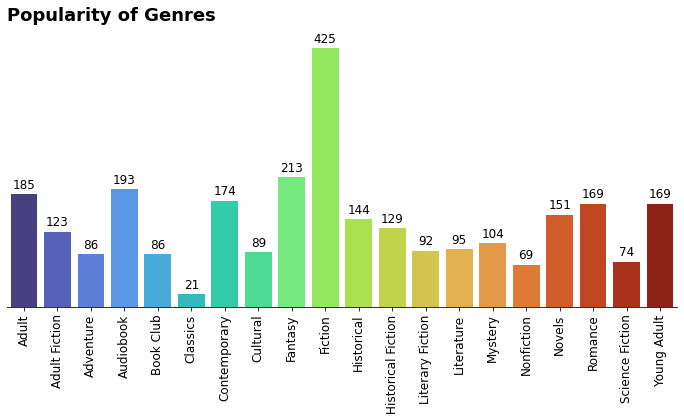

In [22]:
popular_genres = pd.DataFrame(
    genres_gby.sum(axis=0),
    index=genres_gby.sum(axis=0).index,
    columns=['count'])

fig, ax = plt.subplots(figsize=(12,5))
plt.figtext(
    0.125, 0.92, 'Popularity of Genres',
    size=18, weight='bold')
sns.barplot(
    x=popular_genres.index, y='count',
    data=popular_genres, palette='turbo')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width()/2
    ax.annotate(
        f'{height:.0f}',
        xy=(width, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=12)

ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=90, size=12)
fig.savefig(
    'img5-genre-popularity.png',
    dpi=300, bbox_inches='tight')
plt.show()

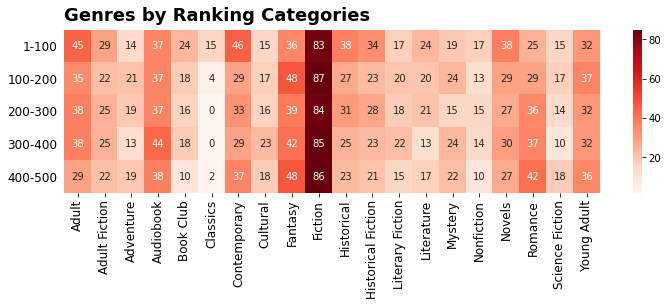

In [23]:
fig, ax = plt.subplots(figsize=(12,3))
sns.heatmap(
    genres_gby, cmap='Reds',
    robust=True, annot=True)
plt.figtext(
    0.125, 0.92,
    'Genres by Ranking Categories',
    size=18, weight='bold')
plt.ylabel(None)
plt.tick_params(
    axis='both',
    which='major',
    labelsize=12,
    left=False)
fig.savefig(
    'img6-genres-by-ranking.png',
    dpi=300, bbox_inches='tight')
plt.show()

Fiction wins the genre popularity contest by a very large margin, dominating every ranking category. Audiobook, which is a book format rather than a genre, also gains quite a popularity. The other runner-ups are Fantasy, Adult/YA, Contemporary, and Romance. While being the least popular genre overall, Classics are interestingly highly represented in the top 100.

### Genres word cloud
Create a list `words` containing every genres extracted from the series `df['genre']`. Join all the extracted genres into one continuous string to generate a word cloud.

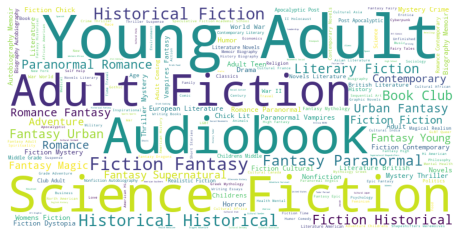

In [24]:
words = []
for index in df['genre'].values.tolist():
    for genre in index:
        words.append(genre)
long_word = " ".join(words)
wc = WordCloud(
    width=800, height=400, background_color='white')
wc.generate(long_word)
plt.figure(figsize=(8,5))
plt.axis('off')
plt.imshow(wc, interpolation='antialiased')
plt.gcf().savefig(
    'img7-genres-word-cloud.png',
    dpi=300, bbox_inches='tight')
plt.show()

### Correlation between variables
Before going further with the analysis, let's check how correlated are the numerical variables with each other.

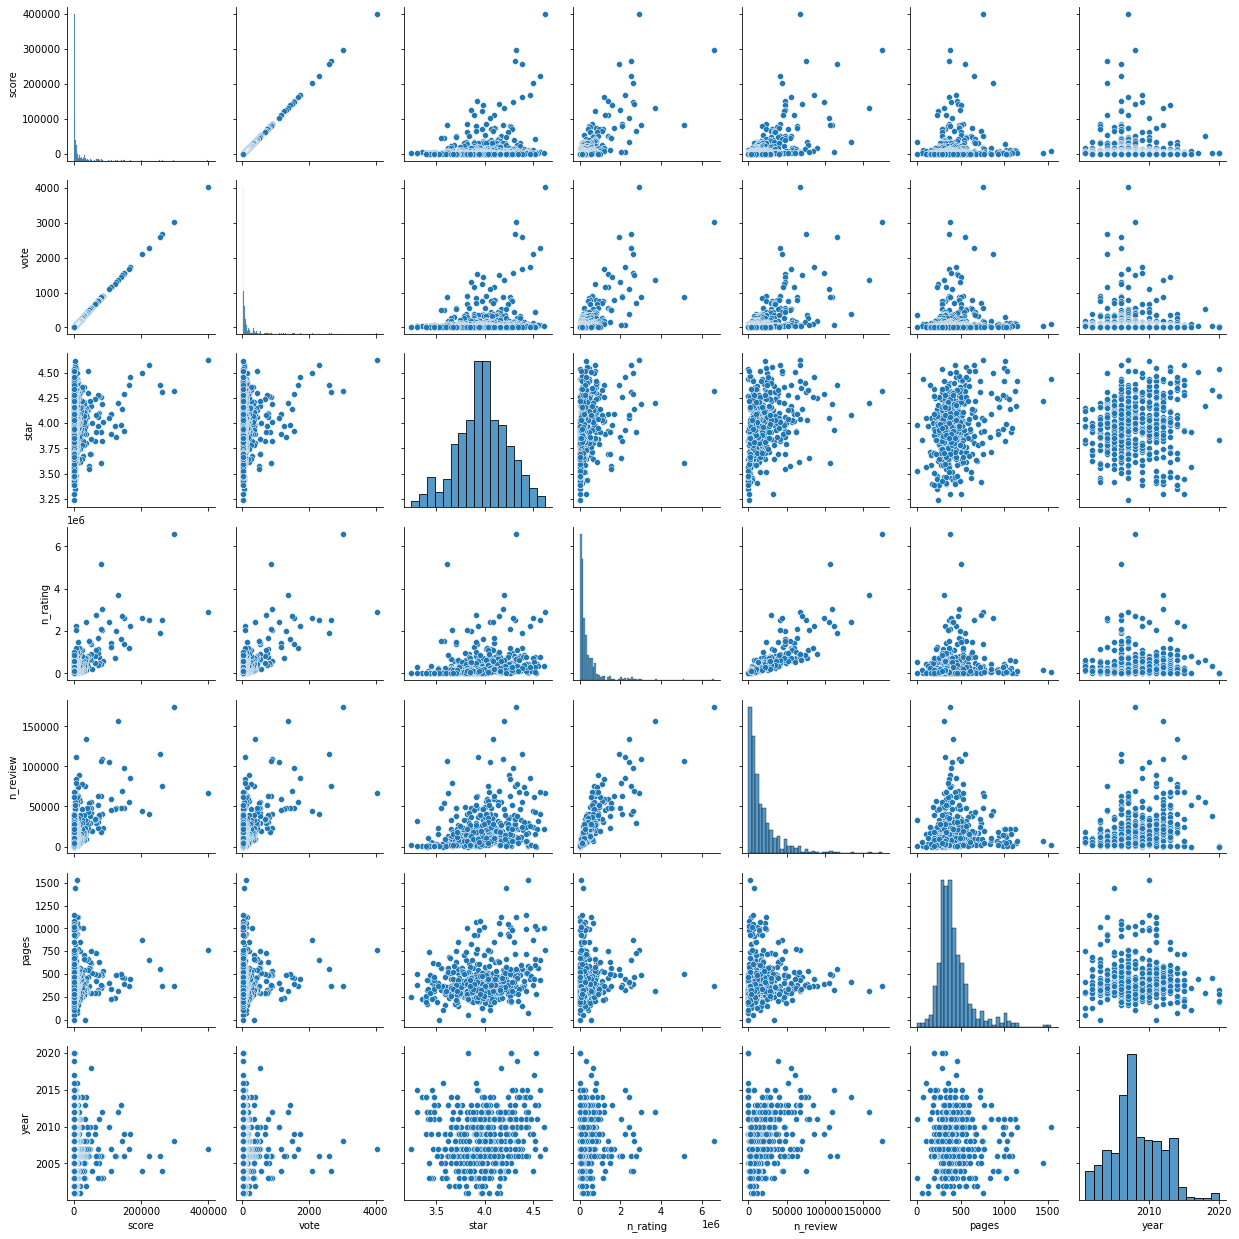

In [25]:
fig = sns.pairplot(data=df)
fig.savefig(
    'img8-correlation-pairplot.png',
    dpi=300, bbox_inches='tight')
plt.show()

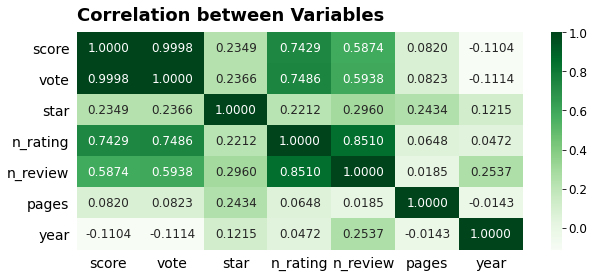

In [26]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,4))
plt.figtext(
    0.125, 0.92, 'Correlation between Variables',
    size=18, weight='bold')
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap='Greens',
    annot=True,
    fmt='.4f',
    annot_kws={'size':12})
plt.tick_params(
    axis='both',
    which='major',
    labelsize=14,
    left=False,
    bottom=False)
plt.yticks(rotation=0)
ax.collections[0].colorbar.ax.tick_params(labelsize=12)
fig.savefig(
    'img9-correlation-matrix.png',
    dpi=300, bbox_inches='tight')
plt.show()

### Ratings & reviews distribution

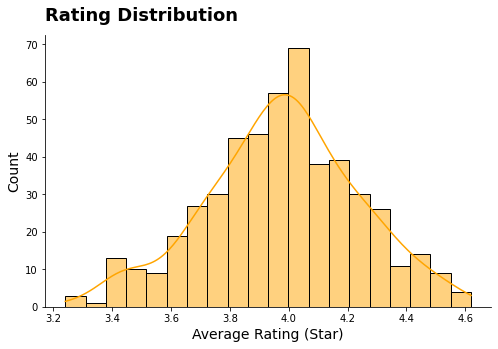

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(
    x='star', data=df, kde=True,
    bins=20, color='orange')
plt.figtext(
    0.125, 0.92, 'Rating Distribution',
    size=18, weight='bold')
plt.xlabel('Average Rating (Star)', size=14)
plt.ylabel('Count', size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig(
    'img10-rating-distribution.png',
    dpi=300, bbox_inches='tight')
plt.show()

From the histogram we can infer that the majority of rating lies just above 4.0 stars. Out of all 500 books, none were rated below 3.2 or higher than 4.7.

In [28]:
df.groupby('star_bin').size().reset_index(name='count')

,star_bin,count
0,3.5 Stars,26
1,4.0 Stars,243
2,4.5 Stars,220
3,5.0 Stars,11


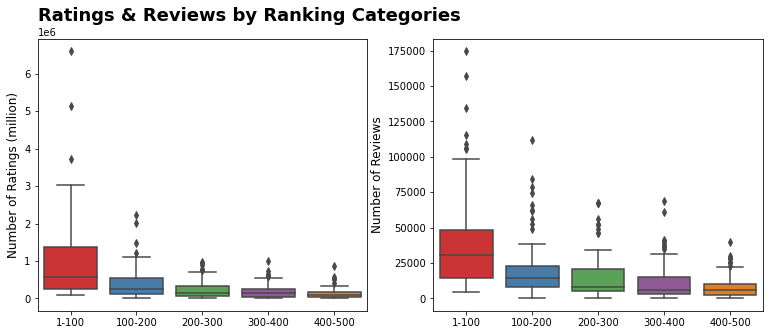

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))
plt.figtext(
    0.125, 0.93,
    'Ratings & Reviews by Ranking Categories',
    size=18, weight='bold')
sns.boxplot(
    ax=axes[0], x='rank_bin', y='n_rating',
    data=df, palette='Set1')
sns.boxplot(
    ax=axes[1], x='rank_bin', y='n_review',
    data=df, palette='Set1')
axes[0].set_xlabel(None)
axes[0].set_ylabel('Number of Ratings (million)', size=12)
axes[1].set_xlabel(None)
axes[1].set_ylabel('Number of Reviews', size=12)
fig.savefig(
    'img11-ratings-reviews-by-ranking.png',
    dpi=300, bbox_inches='tight')
plt.show()

The boxplots show that the more ratings and reviews are given for a book, the higher its ranking. Readers who have rated and reviewed a book are the ones most likely to cast their vote, bumping up the book's score.

### Ratings & reviews on Goodreads score

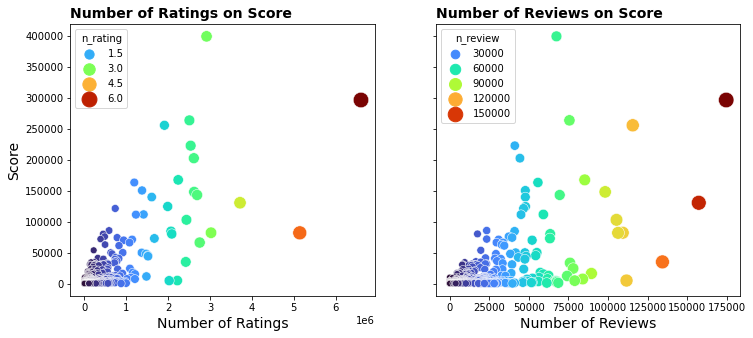

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.scatterplot(
    ax=axes[0], x='n_rating', y='score',
    data=df, hue='n_rating', size='n_rating',
    sizes=(40, 240), palette='turbo')
axes[0].set_title(
    'Number of Ratings on Score',
    loc='left', size=14, weight='bold')
axes[0].set_xlabel('Number of Ratings', size=14)
axes[0].set_ylabel('Score', size=14)

sns.scatterplot(
    ax=axes[1], x='n_review', y='score',
    data=df, hue='n_review', size='n_review',
    sizes=(40, 240), palette='turbo')
axes[1].set_title(
    'Number of Reviews on Score',
    loc='left', size=14, weight='bold')
axes[1].set_xlabel('Number of Reviews', size=14)
fig.savefig(
    'img12-ratings-reviews-on-score.png',
    dpi=300, bbox_inches='tight')
plt.show()

Numbers of ratings and reviews are both positively correlated with the variable `score`, as shown in the correlation matrix: 0.7429 Pearson correlation for ratings and 0.5874 for reviews.

### Highly-rated, most-rated, and most-reviewed
*Harry Potter and the Deathly Hallows* received the highest average rating (4.62 ⭐⭐⭐⭐⭐) while *The Hunger Games*, although barely reaching 4.5 stars on average, generated both the highest number of ratings and reviews.

In [31]:
# Highly-rated
df.loc[df['star'] == df['star'].max()]

,rank_bin,score,vote,title,author,genre,star,star_bin,n_rating,n_review,pages,year
0,1-100,398777,4031,Harry Potter and the Deathly Hallows,J.K. Rowling,"[Fantasy, Young Adult, Fiction, Fantasy, Magic...",4.62,5.0 Stars,2916570,67432,759,2007


In [32]:
# Most-rated
df.loc[df['n_rating'] == df['n_rating'].max()]

,rank_bin,score,vote,title,author,genre,star,star_bin,n_rating,n_review,pages,year
1,1-100,296347,3025,The Hunger Games,Suzanne Collins,"[Young Adult, Fiction, Science Fiction, Dystop...",4.32,4.5 Stars,6600922,174470,374,2008


In [33]:
# Most-reviewed
df.loc[df['n_review'] == df['n_review'].max()]

,rank_bin,score,vote,title,author,genre,star,star_bin,n_rating,n_review,pages,year
1,1-100,296347,3025,The Hunger Games,Suzanne Collins,"[Young Adult, Fiction, Science Fiction, Dystop...",4.32,4.5 Stars,6600922,174470,374,2008


### Number of pages

The 500 best books of the 21st century on average are 400 pages long.

In [34]:
df['pages'].mean()

422.974

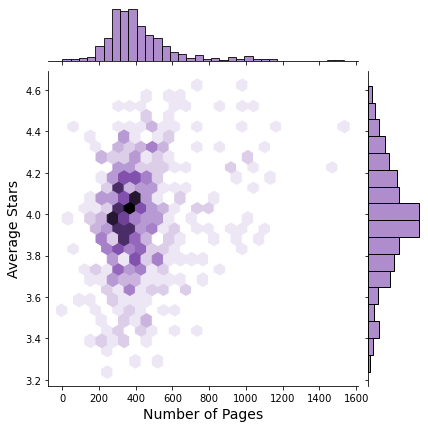

In [35]:
fig = sns.jointplot(
    x='pages', y='star', data=df,
    kind='hex', height=6, color='tab:purple')
fig.set_axis_labels(
    'Number of Pages',
    'Average Stars',
    size=14)
fig.savefig(
    'img13-pages-on-stars.png',
    dpi=300, bbox_inches='tight')
plt.show()

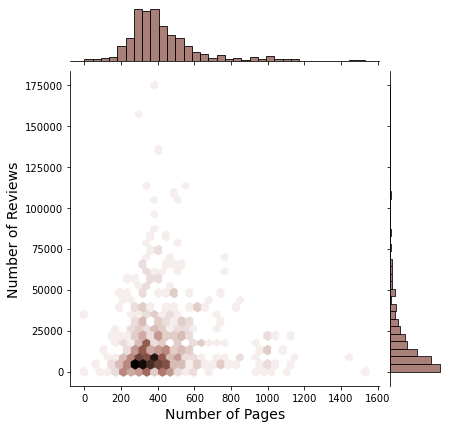

In [36]:
fig = sns.jointplot(
    x='pages', y='n_review', data=df,
    kind='hex', height=6, color='tab:brown')
fig.set_axis_labels(
    'Number of Pages',
    'Number of Reviews',
    size=14)
fig.savefig(
    'img14-reviews-on-stars.png',
    dpi=300, bbox_inches='tight')
plt.show()

Is the average rating of a book affected by its page count? No, there is no significant correlation. However, looking at the two jointplots above, most ratings as well as reviews were given for books with a moderate page count (i.e., 200-400 pages). We can safely say that thicker books seem to scare readers away.

### Publication Year

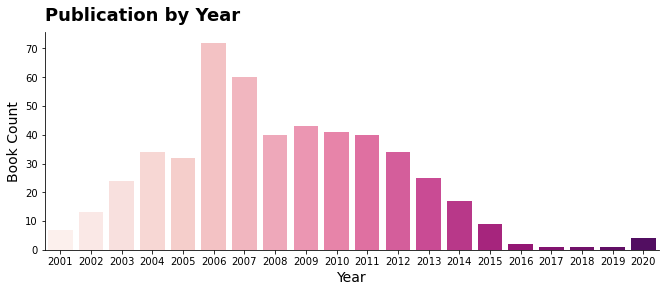

In [37]:
fig, ax = plt.subplots(figsize=(11,4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.countplot(
    x='year', data=df, palette='RdPu')
plt.figtext(
    0.125, 0.92,
    'Publication by Year',
    size=18, weight='bold')
plt.xlabel('Year', size=14)
plt.ylabel('Book Count', size=14)
fig.savefig(
    'img15-publication-by-year.png',
    dpi=300, bbox_inches='tight')
plt.show()

A significant proportion of the books were published in the years 2006 and 2007. These books are also ranked higher in the list: as many as 44 books populate almost half of the top 1-100.

In [38]:
top_year = df.loc[(
    df['year'] == 2006) | (df['year'] == 2007)].sort_values(
    by='score', ascending=False)
print('Ranking distribution, 2006-2007 books:\n')
print(top_year.groupby('rank_bin').size().reset_index(name='book_count'))
print('\n10 Top-scored 2006-2007 books:')
top_year[['year', 'score', 'title', 'author']].head(10)

Ranking distribution, 2006-2007 books:

  rank_bin  book_count
0    1-100          44
1  100-200          20
2  200-300          19
3  300-400          26
4  400-500          23

10 Top-scored 2006-2007 books:


,year,score,title,author
0,2007,398777,Harry Potter and the Deathly Hallows,J.K. Rowling
3,2006,255666,The Book Thief,Markus Zusak
4,2006,222873,Harry Potter and the Half-Blood Prince,J.K. Rowling
7,2007,163634,A Thousand Splendid Suns,Khaled Hosseini
8,2006,150796,Life of Pi,Yann Martel
13,2006,125048,The Da Vinci Code,Dan Brown
14,2006,121848,The Road,Cormac McCarthy
15,2007,112212,Water for Elephants,Sara Gruen
19,2006,85189,The Lovely Bones,Alice Sebold
21,2006,82599,Twilight,Stephenie Meyer


## Conclusion

A book's score, which determines its ranking in the list, are positively correlated with three variables, i.e., the number of
- (1) ratings,
- (2) reviews, and
- (3) votes.

Books that ranked higher in the "Best Books of the 21st Century" list share a common trait: they are part of a book series and are of the Fiction and Fantasy genres. Authors of these two genres also received higher scores.

Books included in the list are rated higher than 3.2 stars, none were rated above 4.7. On average they are rated 3.98 stars.

Looking at the concentration of ratings and reviews, the preferred number of pages lies between 200-400 pages.